In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
import tensorflow as tf
import warnings
warnings.simplefilter(action='ignore')

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/f

In [3]:

from keras.datasets import boston_housing

Using TensorFlow backend.


train = pd.read_csv("https://raw.githubusercontent.com/reejungkim/HousingPrice/master/train.csv", error_bad_lines=False)
train.head()

test = pd.read_csv("https://raw.githubusercontent.com/reejungkim/HousingPrice/master/test.csv", error_bad_lines=False)
test.head()

In [4]:
pd.DataFrame(boston_housing.load_data())

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

pd.DataFrame(x_train)

pd.DataFrame(y_train)

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [7]:
train_data = np.concatenate([x_train, y_train[:, np.newaxis]], axis=1)
#train_data = pd.concat( [pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1, ignore_index=True).values
test_data = np.concatenate([x_test, y_test[:, np.newaxis]], axis=1)

In [8]:
df_train = pd.DataFrame(train_data, columns=col_name)
df_test = pd.DataFrame(test_data, columns=col_name)

In [9]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [10]:
percentages = ['CRIM', 'ZN', 'INDUS', 'AGE', 'PTRATIO', 'LSTAT']

In [11]:
#normalizing data
for col in percentages:
    df_train[col] /=100
    df_test[col] /=100
    
df_train['B'] /=1000
df_train['TAX']/=10000
df_test['B'] /=1000
df_test['TAX']/=10000

In [12]:
x_train, y_train = df_train.values[:, :13], df_train.values[:, 13]
x_test, y_test = df_test.values[:, :13], df_test.values[:, 13]

In [13]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.037451,0.114802,0.111044,0.061881,0.557356,6.267082,0.690106,3.740271,9.440594,0.040590,0.184760,0.354783,0.127408,22.395050
std,0.092407,0.237677,0.068113,0.241238,0.117293,0.709788,0.279407,2.030215,8.698360,0.016637,0.022004,0.094111,0.072545,9.210442
min,0.000063,0.000000,0.004600,0.000000,0.385000,3.561000,0.029000,1.129600,1.000000,0.018800,0.126000,0.000320,0.017300,5.000000
25%,0.000814,0.000000,0.051300,0.000000,0.453000,5.874750,0.454750,2.077100,4.000000,0.027900,0.172250,0.374673,0.068900,16.675000
50%,0.002689,0.000000,0.096900,0.000000,0.538000,6.198500,0.785000,3.142300,5.000000,0.033000,0.191000,0.391250,0.113950,20.750000
75%,0.036748,0.125000,0.181000,0.000000,0.631000,6.609000,0.941000,5.118000,24.000000,0.066600,0.202000,0.396157,0.170925,24.800000
max,0.889762,1.000000,0.277400,1.000000,0.871000,8.725000,1.000000,10.710300,24.000000,0.071100,0.220000,0.396900,0.379700,50.000000


In [14]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.012325,0.000,0.0814,0.0,0.5380,6.142,0.917,3.9769,4.0,0.0307,0.210,0.39690,0.1872
1,0.000218,0.825,0.0203,0.0,0.4150,7.610,0.157,6.2700,2.0,0.0348,0.147,0.39538,0.0311
2,0.048982,0.000,0.1810,0.0,0.6310,4.970,1.000,1.3325,24.0,0.0666,0.202,0.37552,0.0326
3,0.000396,0.000,0.0519,0.0,0.5150,6.037,0.345,5.9853,5.0,0.0224,0.202,0.39690,0.0801
4,0.036931,0.000,0.1810,0.0,0.7130,6.376,0.884,2.5671,24.0,0.0666,0.202,0.39143,0.1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.002198,0.000,0.0691,0.0,0.4480,5.602,0.620,6.0877,3.0,0.0233,0.179,0.39690,0.1620
400,0.001621,0.200,0.0696,0.0,0.4640,6.240,0.163,4.4290,3.0,0.0223,0.186,0.39690,0.0659
401,0.000347,0.350,0.0606,0.0,0.4379,6.031,0.233,6.6407,1.0,0.0304,0.169,0.36225,0.0783
402,0.021492,0.000,0.1958,0.0,0.8710,5.709,0.985,1.6232,5.0,0.0403,0.147,0.26195,0.1579


print(np.max(x_train, axis=1))

sns.pairplot(df_train)

In [15]:
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [16]:


def create_model_01():
    model = models.Sequential()
    model.add(layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [17]:
from keras.optimizers import Adam # Optimizer

def create_model_02():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'mape', metrics=['mae']) #'mse')
    return model

model = Sequential()

model.add(Dense(16, activation='sigmoid', input_shape=(13,)))
model.add(Dense(1, activation='linear'))

In [18]:
model = Sequential([
    Dense(250, input_shape=(13,)),
    Activation('sigmoid'),
    Dense(10),
    Activation('linear'),
    Activation('softmax'),
    Dense(1)
])


In [19]:

model = create_model_02()
model.summary()
#model.build(input_shape=(None,3))# build the model by calling the build method

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 320)               4480      
_________________________________________________________________
dense_5 (Dense)              (None, 384)               123264    
_________________________________________________________________
dense_6 (Dense)              (None, 352)               135520    
_________________________________________________________________
dense_7 (Dense)              (None, 448)               158144    
_________________________________________________________________
dense_8 (Dense)              (None, 160)               71840     
_________________________________________________________________
dense_9 (Dense)              (None, 160)               25760     
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)

history = model.fit(x_train, y_train, 
                    batch_size=100, epochs=20, 
                    validation_data=(x_valid, y_valid))

2022-05-21 21:04:41.957155: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA



Train on 323 samples, validate on 81 samples
Epoch 1/20
323/323 [==============================] - 0s 810us/step - loss: 98.3873 - mae: 21.8739 - val_loss: 96.1378 - val_mae: 22.6983
Epoch 2/20
323/323 [==============================] - 0s 95us/step - loss: 95.4884 - mae: 21.3740 - val_loss: 93.2859 - val_mae: 22.2050
Epoch 3/20
323/323 [==============================] - 0s 106us/step - loss: 92.5675 - mae: 20.8712 - val_loss: 89.7764 - val_mae: 21.6017
Epoch 4/20
323/323 [==============================] - 0s 101us/step - loss: 88.8705 - mae: 20.2422 - val_loss: 85.0441 - val_mae: 20.7843
Epoch 5/20
323/323 [==============================] - 0s 110us/step - loss: 83.7999 - mae: 19.3720 - val_loss: 79.2414 - val_mae: 19.6964
Epoch 6/20
323/323 [==============================] - 0s 113us/step - loss: 77.4230 - mae: 18.2187 - val_loss: 71.9248 - val_mae: 18.2687
Epoch 7/20
323/323 [==============================] - 0s 116us/step - loss: 70.6883 - mae: 16.8265 - val_loss: 64.6617 - val_ma

model.compile(optimizer='sgd', loss='mse', metrics=['mape']) 
#sgd - stochastic gradient descent
#mse - mean square error
#mape - mean absolute percentage error

In [21]:
x_train.shape, x_valid.shape

((323, 13), (81, 13))

for i in  range(2):
    
    model = create_model_02()

    history = model.fit(x_train, y_train, batch_size=4, epochs=10, validation_data=(x_valid, y_valid))

    all_scores = []
    all_mae_histories = []

    mae_history = history.history['val_loss']
    all_mae_histories.append(mae_history)
    
    val_mse, val_mae = model.evaluate(x_valid, y_valid, verbose=0)
    all_scores.append(val_mae)

all_scores

num_epochs = 100

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, 'r', label='aver_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [22]:
x_train.shape

(323, 13)

history.history

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,loss,mae,epoch
15,25.291084,6.544141,22.957299,5.138172,15
16,25.277815,6.658701,21.764696,4.919373,16
17,25.002684,6.707671,21.827843,5.035351,17
18,24.199223,6.653338,21.645053,5.108058,18
19,23.690674,6.462867,21.313032,5.113528,19


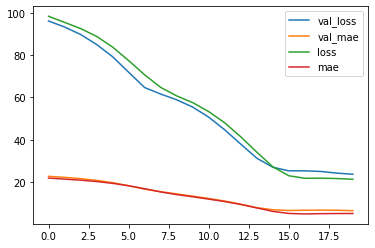

In [24]:
for name, value in history.history.items():
    plt.plot(value, label=name)
plt.legend()
plt.show()

## evaluate model

In [25]:
results = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 67us/step


In [26]:
results

[26.903070973415, 6.13114070892334]

print('Loss: {:.6f} - MAPE: {:.6f}'.format(*results))

## list predicted value

In [27]:
test_pred = model.predict(x_test)

In [28]:
test_pred = np.squeeze(test_pred)

In [29]:
test_pred

array([12.318801 , 17.273087 , 20.978199 , 18.6848   , 20.781174 ,
       17.160547 , 25.728819 , 22.71368  , 18.759653 , 13.287907 ,
       19.657656 , 20.994215 , 18.06859  , 24.525414 , 11.687833 ,
       25.269802 , 22.976227 , 23.152855 , 13.578591 , 13.116408 ,
       11.538562 , 11.830068 , 18.803839 , 23.989853 , 28.643768 ,
       13.573486 , 20.666992 , 33.867767 , 12.389136 , 23.374035 ,
       18.451181 , 12.9583   , 24.48435  , 22.534044 , 12.450952 ,
       10.935433 , 15.898135 , 17.818634 , 18.165081 , 28.245716 ,
       30.77639  , 22.09503  , 12.476514 , 22.102163 , 20.92831  ,
       20.33458  , 20.035786 , 19.93147  , 13.307843 , 20.766823 ,
       29.938694 , 22.967098 , 11.146464 , 20.19946  , 23.978989 ,
       22.98774  , 12.048233 , 24.231579 , 23.287443 , 23.572798 ,
       13.510549 , 12.308106 , 12.451461 , 17.55058  , 21.669964 ,
       29.230877 , 12.6331415, 24.85532  , 15.485013 , 11.707258 ,
       13.203973 , 28.531305 , 13.272109 , 16.24839  , 22.4576

## compare predicted value to true value

In [30]:
for pred, true in zip(test_pred, y_test):
    print('Pred: {:.6f} - True: {:.6f}'.format(pred,true))

Pred: 12.318801 - True: 7.200000
Pred: 17.273087 - True: 18.800000
Pred: 20.978199 - True: 19.000000
Pred: 18.684799 - True: 27.000000
Pred: 20.781174 - True: 22.200000
Pred: 17.160547 - True: 24.500000
Pred: 25.728819 - True: 31.200000
Pred: 22.713680 - True: 22.900000
Pred: 18.759653 - True: 20.500000
Pred: 13.287907 - True: 23.200000
Pred: 19.657656 - True: 18.600000
Pred: 20.994215 - True: 14.500000
Pred: 18.068590 - True: 17.800000
Pred: 24.525414 - True: 50.000000
Pred: 11.687833 - True: 20.800000
Pred: 25.269802 - True: 24.300000
Pred: 22.976227 - True: 24.200000
Pred: 23.152855 - True: 19.800000
Pred: 13.578591 - True: 19.100000
Pred: 13.116408 - True: 22.700000
Pred: 11.538562 - True: 12.000000
Pred: 11.830068 - True: 10.200000
Pred: 18.803839 - True: 20.000000
Pred: 23.989853 - True: 18.500000
Pred: 28.643768 - True: 20.900000
Pred: 13.573486 - True: 23.000000
Pred: 20.666992 - True: 27.500000
Pred: 33.867767 - True: 30.100000
Pred: 12.389136 - True: 9.500000
Pred: 23.374035 

## Save model

model_path = 'model.h5'
model.save(model_path)

In [31]:
from keras.models import load_model

loaded_model = load_model(model_path)

loaded_model.summary()

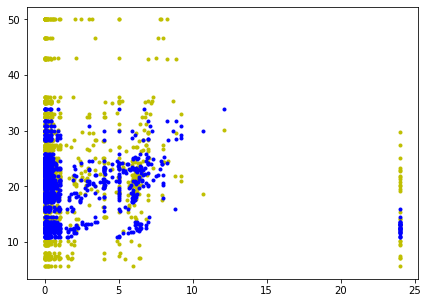

In [32]:
plt.figure(figsize=(7, 5))
plt.plot(x_test, y_test, '.y', x_test, test_pred, '.b')
plt.show()

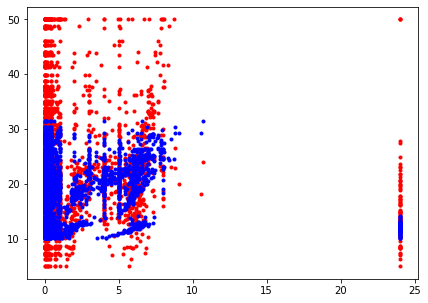

In [33]:
train_pred = model.predict(x_train)
train_pred = np.squeeze(train_pred)

plt.figure(figsize=(7, 5))
plt.plot(x_train, y_train, '.r', x_train, train_pred, '.b')
plt.show()

In [61]:
import shap

In [62]:
# select backgroud for shap
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
# DeepExplainer to explain predictions of the model
explainer = shap.DeepExplainer(model, background)
# compute shap values
shap_values = explainer.shap_values(x_test)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


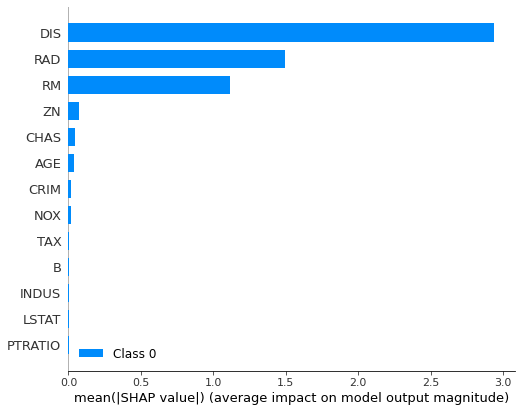

In [63]:
shap.summary_plot(shap_values, 
                  features=x_train, 
                  feature_names=col_name)